### **1. Identifying the Problem**

The goal is to develop a machine learning model to predict stress levels in university students based on various factors, including the Perceived Stress Scale (PSS) scores and other features.

### **2. Data Understanding**

Dataset Head:
                  Name    1. Age 2. Gender               3.University  \
0  Shavindha Subhashana  Over 25      Male  Open university sri lanka   
1      Himaya Chamudini    22-25    Female             Horizon Campus   
2       Janith Induwara    22-25      Male             Horizon Campus   
3        Viraj Sangeeth    22-25      Male             Horizon Campus   
4                Udara     22-25    Female             Horizon Campus   

  4.Year of Study 5. Major/Field of Study  \
0        4th year              Management   
1        4th year     IT/Computer Science   
2        4th year     IT/Computer Science   
3        4th year     IT/Computer Science   
4        4th year     IT/Computer Science   

  1. How many hours per week do you typically spend on coursework and studying?  \
0                                        10-20 hours                              
1                                  Less than 5 hours                              
2                          

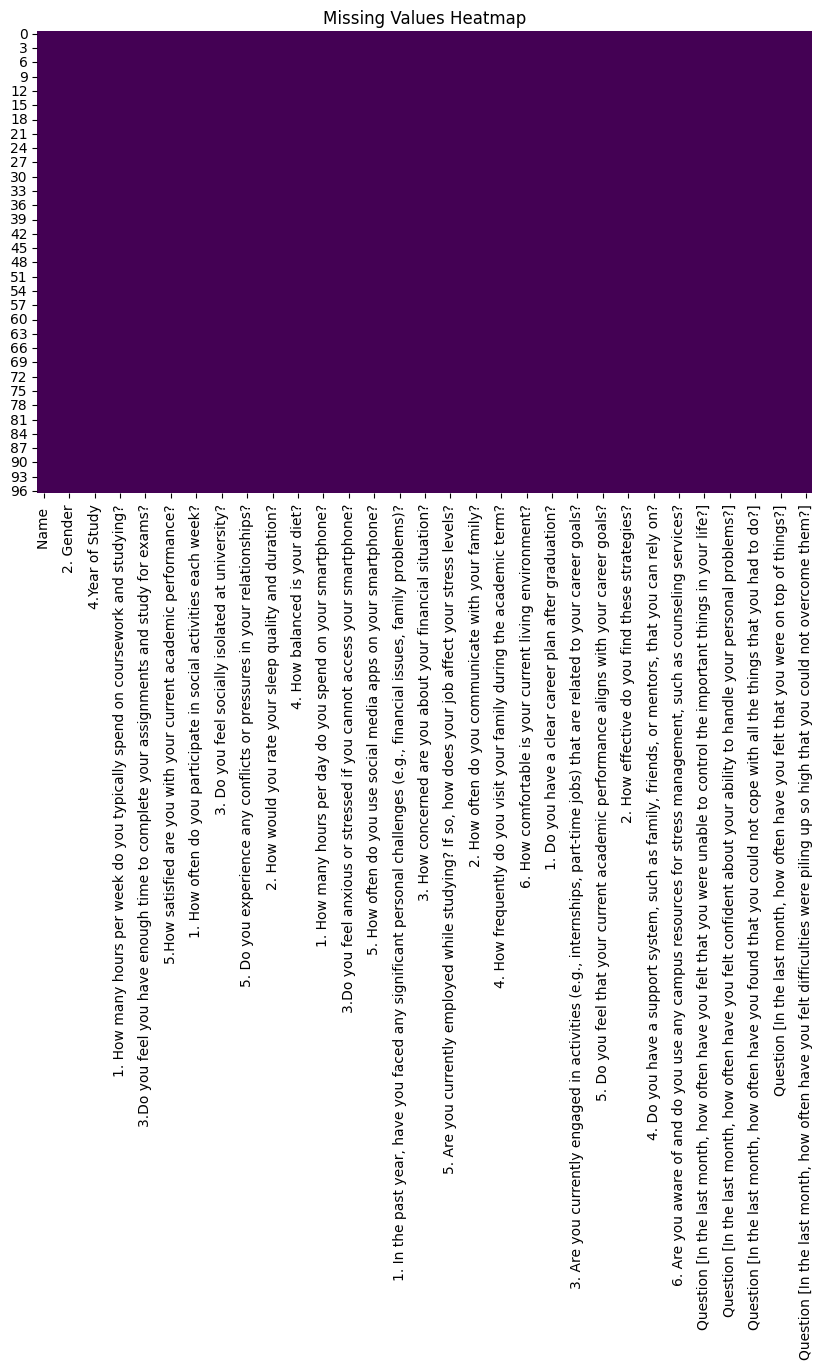

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (update with the correct file path or Colab upload location)
file_path = "/content/University Student Stress Assessment Survey .csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Head:")
print(data.head())

# Display dataset shape and column info
print("\nDataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

# Display basic statistics
print("\nBasic Statistics:")
print(data.describe(include='all'))

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Visualizing missing data heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()



### **3. Data Preprocessing**

In [3]:
# Drop unnecessary columns as specified
columns_to_drop = ['Name ', '3.University', '5. Major/Field of Study',
                   '1. What strategies do you use to manage stress? (Select all that apply)']
data = data.drop(columns=columns_to_drop)

# Verify the number of columns remaining
print("\nTotal Remaining Columns:", len(data.columns))

# Print column names
print("\nRemaining Columns:")
for col in data.columns:
    print(col)



Total Remaining Columns: 57

Remaining Columns:
1. Age
2. Gender
4.Year of Study
1. How many hours per week do you typically spend on coursework and studying?
2. How often do you feel overwhelmed by your academic workload?
3.Do you feel you have enough time to complete your assignments and study for exams?
4. How do you manage deadlines and exam preparations?
5.How satisfied are you with your current academic performance?
6. Do you feel that stress has affected your academic performance?
1. How often do you participate in social activities each week?
2. Do you feel that you have a strong support system among your peers?
3. Do you feel socially isolated at university?
4. How satisfied are you with your social life and friendships?
5. Do you experience any conflicts or pressures in your relationships?
1. On average, how many hours of sleep do you get each night?
2. How would you rate your sleep quality and duration?
3. How frequently do you engage in physical exercise each week?
4. How 

In [4]:
# Ordinal encoding mappings
ordinal_mappings = {
    '1. Age': ['Under 18', '18-21', '22-25', 'Over 25'],
    '4.Year of Study': ['1st Year', '2nd Year', '3rd year', '4th year'],
    '1. How many hours per week do you typically spend on coursework and studying?': ['Less than 5 hours', '5-10 hours', '10-20 hours', 'More than 20 hours'],
    '2. How often do you feel overwhelmed by your academic workload?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '3.Do you feel you have enough time to complete your assignments and study for exams?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '4. How do you manage deadlines and exam preparations?': ['Poorly', 'Average', 'Exceptionally well'],
    '5.How satisfied are you with your current academic performance?': ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied'],
    '1. How often do you participate in social activities each week?': ['Never', 'Once a week', '2-3 times a week', 'Daily'],
    '4. How satisfied are you with your social life and friendships?': ['Very dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very satisfied'],
    '5. Do you experience any conflicts or pressures in your relationships?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '1. On average, how many hours of sleep do you get each night?': ['Less than 4 hours', '4-6 hours', '6-8 hours', 'More than 8 hours'],
    '2. How would you rate your sleep quality and duration?': ['Very poor', 'Poor', 'Fair', 'Good', 'Very good'],
    '3. How frequently do you engage in physical exercise each week?': ['Never', 'Once a week', '2-3 times a week', 'Daily'],
    '4. How balanced is your diet?': ['Very unbalanced', 'Unbalanced', 'Neutral', 'Balanced', 'Very balanced'],
    '5. Do you often skip meals?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '1. How many hours per day do you spend on your smartphone?': ['Less than 1 hour', '1-3 hours', '3-5 hours', 'More than 5 hours'],
    '2. How often do you use your smartphone for non-academic purposes during study hours?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '4. How often do you check your smartphone for messages or notifications?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '5. How often do you use social media apps on your smartphone?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '2. How have these challenges impacted your academic performance?:': ['No impact', 'Slight impact', 'Moderate impact','Severe impact'],
    '3. How concerned are you about your financial situation?': ['Not at all concerned', 'Slightly concerned', 'Moderately concerned', 'Very concerned'],
    '4. Do you feel stressed about paying for tuition, books, or living expenses?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '5. Are you currently employed while studying? If so, how does your job affect your stress levels?': ['Not working', 'Slightly increases stress', 'Moderately increases stress', 'Significantly increases stress'],
    '1. What is your current living situation?': ['Living with parents', 'Living in a university hostel/boarding house', 'Living in a rented apartment/house (private accommodation)', 'Other'],
    '2. How often do you communicate with your family?': ['Daily', 'Weekly', 'Monthly', 'Rarely'],
    '4. How frequently do you visit your family during the academic term?':['Weekly', 'Monthly', 'Once per term', 'Rarely', 'Never'],
    '5. Do family issues (e.g., conflicts, responsibilities) affect your academic performance?':['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '6. How comfortable is your current living environment?': ['Very comfortable', 'Comfortable', 'Neutral', 'Uncomfortable', 'Very uncomfortable'],
    '2. How confident are you in achieving your career goals?': ['Very confident', 'Somewhat confident', 'Not confident'],
    '4. How often do you think about your future career prospects?': ['Daily', 'Weekly', 'Monthly', 'Rarely', 'Never'],
    '5. Do you feel that your current academic performance aligns with your career goals?': ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree'],
    '2. How effective do you find these strategies?': ['Very effective','Somewhat effective','Not effective'],
    '4. Do you have a support system, such as family, friends, or mentors, that you can rely on?': ['No support system','Weak support system','Moderate support system','Strong support system','Very strong support system'],
    '5. How often do you seek help or advice from others when stressed?': ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'],
    '6. Are you aware of and do you use any campus resources for stress management, such as counseling services?': ['Not aware', 'Aware but never used','Used occasionally','Used frequently'],
    '6. Do you feel that stress has affected your academic performance?': ['No', 'Sometimes', 'Yes'],
    '3. Do you feel socially isolated at university?': ['No', 'Sometimes', 'Yes'],
                      '3. Do you feel supported by your family in your academic pursuits?': ['No', 'Sometimes', 'Yes'],
                      '7. Do you have any family responsibilities (e.g., caring for siblings, financial support) that impact your studies?': ['No', 'Sometimes', 'Yes'],
                      '1. Do you have a clear career plan after graduation?': ['No', 'Sometimes', 'Yes'],
                      '3. Do you seek professional help (e.g., counseling) for stress management?': ['No', 'Sometimes', 'Yes'],


}

# Apply ordinal encoding
for col, categories in ordinal_mappings.items():
    if col in data.columns:
        data[col] = data[col].astype('category')
        data[col] = data[col].cat.set_categories(categories, ordered=True).cat.codes

# Binary categorical columns for one-hot encoding
binary_columns = ['2. Gender', '2. Do you feel that you have a strong support system among your peers?',
                  '3. Do you feel socially isolated at university?', '6. Do you feel anxious or stressed when you use social media apps on your smartphone?',
                  '1. In the past year, have you faced any significant personal challenges (e.g., financial issues, family problems)?',
    '3. Are you currently engaged in activities (e.g., internships, part-time jobs) that are related to your career goals?',]

# Apply one-hot encoding to binary columns
data = pd.get_dummies(data, columns=binary_columns, drop_first=True)

# Consistently encode PSS questions
pss_columns = [col for col in data.columns if 'Question' in col]
pss_mapping = {'Never': 0, 'Sometimes': 1, 'Fairly often': 2, 'Very often': 3}

for col in pss_columns:
    data[col] = data[col].map(pss_mapping)

# Aggregate PSS questions into a single feature
data['PSS_Total'] = data[pss_columns].sum(axis=1)

# Drop individual PSS question columns
data = data.drop(columns=pss_columns)

# Normalize numerical columns for modeling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display updated dataset
print("\nUpdated Dataset Info:")
print(data.info())

print("\nSample of Preprocessed Data:")
print(data.head())



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 49 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   1. Age                                                                                                                     97 non-null     int8   
 1   4.Year of Study                                                                                                            97 non-null     int8   
 2   1. How many hours per week do you typically spend on coursework and studying?                                              97 non-null     int8   
 3   2. How often do you feel overwhelmed by your academic workload?                                              

In [5]:
# Check for non-encoded columns (object type or missing encodings)
non_encoded_columns = data.select_dtypes(include=['object']).columns.tolist()

# Print non-encoded columns for review
print("\nNon-Encoded Columns (to be skipped):")
print(non_encoded_columns)


Non-Encoded Columns (to be skipped):
['3.Do you feel anxious or stressed if you cannot access your smartphone?', '2. How have these challenges impacted your academic performance?', '7.Do you have any family responsibilities (e.g., caring for siblings, financial support) that impact your studies?']


In [6]:
# Encoding '3.Do you feel anxious or stressed if you cannot access your smartphone?'
if '3.Do you feel anxious or stressed if you cannot access your smartphone?' in data.columns:
    data['3.Do you feel anxious or stressed if you cannot access your smartphone?'] = data[
        '3.Do you feel anxious or stressed if you cannot access your smartphone?'
    ].map({'Yes': 1, 'No': 0})

# Encoding '2. How have these challenges impacted your academic performance?'
if '2. How have these challenges impacted your academic performance?' in data.columns:
    ordinal_mapping = {
        'No impact': 0,
        'Slight impact': 1,
        'Moderate impact': 2,
        'Severe impact': 3
    }
    data['2. How have these challenges impacted your academic performance?'] = data[
        '2. How have these challenges impacted your academic performance?'
    ].map(ordinal_mapping)

# Encoding '7.Do you have any family responsibilities (e.g., caring for siblings, financial support) that impact your studies?'
if '7.Do you have any family responsibilities (e.g., caring for siblings, financial support) that impact your studies?' in data.columns:
    data['7.Do you have any family responsibilities (e.g., caring for siblings, financial support) that impact your studies?'] = data[
        '7.Do you have any family responsibilities (e.g., caring for siblings, financial support) that impact your studies?'
    ].map({'No': 0, 'Sometimes': 1, 'Yes': 2})

# Validate the dataset
print("\nUpdated Dataset Info:")
print(data.info())

print("\nSample of Preprocessed Data:")
print(data.head())



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 49 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   1. Age                                                                                                                     97 non-null     int8   
 1   4.Year of Study                                                                                                            97 non-null     int8   
 2   1. How many hours per week do you typically spend on coursework and studying?                                              97 non-null     int8   
 3   2. How often do you feel overwhelmed by your academic workload?                                              

In [7]:
# List of all expected questions from the questionnaire (57 total)
expected_questions = [
    "1. Age", "2. Gender", "4.Year of Study",
    "1. How many hours per week do you typically spend on coursework and studying?",
    "2. How often do you feel overwhelmed by your academic workload?",
    "3.Do you feel you have enough time to complete your assignments and study for exams?",
    "4. How do you manage deadlines and exam preparations?",
    "5.How satisfied are you with your current academic performance?",
    "6. Do you feel that stress has affected your academic performance?",
    "1. How often do you participate in social activities each week?",
    "2. Do you feel that you have a strong support system among your peers?",
    "3. Do you feel socially isolated at university?",
    "4. How satisfied are you with your social life and friendships?",
    "5. Do you experience any conflicts or pressures in your relationships?",
    "1. On average, how many hours of sleep do you get each night?",
    "2. How would you rate your sleep quality and duration?",
    "3. How frequently do you engage in physical exercise each week?",
    "4. How balanced is your diet?",
    "5. Do you often skip meals?",
    "1. How many hours per day do you spend on your smartphone?",
    "2. How often do you use your smartphone for non-academic purposes during study hours?",
    "3.Do you feel anxious or stressed if you cannot access your smartphone?",
    "4. How often do you check your smartphone for messages or notifications?",
    "5. How often do you use social media apps on your smartphone?",
    "6. Do you feel anxious or stressed when you use social media apps on your smartphone?",
    "1. In the past year, have you faced any significant personal challenges (e.g., financial issues, family problems)?",
    "2. How have these challenges impacted your academic performance?",
    "3. How concerned are you about your financial situation?",
    "4. Do you feel stressed about paying for tuition, books, or living expenses?",
    "5. Are you currently employed while studying? If so, how does your job affect your stress levels?",
    "1. What is your current living situation?",
    "2. How often do you communicate with your family?",
    "3. Do you feel supported by your family in your academic pursuits?",
    "4. How frequently do you visit your family during the academic term?",
    "5. Do family issues (e.g., conflicts, responsibilities) affect your academic performance?",
    "6. How comfortable is your current living environment?",
    "7.Do you have any family responsibilities (e.g., caring for siblings, financial support) that impact your studies?",
    "1. Do you have a clear career plan after graduation?",
    "2. How confident are you in achieving your career goals?",
    "3. Are you currently engaged in activities (e.g., internships, part-time jobs) that are related to your career goals?",
    "4. How often do you think about your future career prospects?",
    "5. Do you feel that your current academic performance aligns with your career goals?",
    "2. How effective do you find these strategies?",
    "3. Do you seek professional help (e.g., counseling) for stress management?",
    "4. Do you have a support system, such as family, friends, or mentors, that you can rely on?",
    "5. How often do you seek help or advice from others when stressed?",
    "6. Are you aware of and do you use any campus resources for stress management, such as counseling services?",
    "PSS_Total"  # Aggregated Perceived Stress Scale feature
]

# Compare with actual columns in the preprocessed dataset
actual_columns = data.columns.tolist()

# Find missing questions
missing_questions = [q for q in expected_questions if q not in actual_columns]

# Find unexpected columns in the dataset
unexpected_columns = [col for col in actual_columns if col not in expected_questions]

# Print results
print("Missing Questions:")
print(missing_questions)

print("\nUnexpected Columns:")
print(unexpected_columns)


Missing Questions:
['2. Gender', '2. Do you feel that you have a strong support system among your peers?', '3. Do you feel socially isolated at university?', '6. Do you feel anxious or stressed when you use social media apps on your smartphone?', '1. In the past year, have you faced any significant personal challenges (e.g., financial issues, family problems)?', '3. Are you currently engaged in activities (e.g., internships, part-time jobs) that are related to your career goals?']

Unexpected Columns:
['2. Gender_Male', '2. Do you feel that you have a strong support system among your peers?_Yes', '3. Do you feel socially isolated at university?_1', '3. Do you feel socially isolated at university?_2', '6. Do you feel anxious or stressed when you use social media apps on your smartphone?_Yes', '1. In the past year, have you faced any significant personal challenges (e.g., financial issues, family problems)?_Yes', '3. Are you currently engaged in activities (e.g., internships, part-time j

In [8]:
# Define mapping for renaming one-hot encoded columns back to original names
one_hot_to_original = {
    '2. Gender_Male': '2. Gender',
    '2. Do you feel that you have a strong support system among your peers?_Yes': '2. Do you feel that you have a strong support system among your peers?',
    '3. Do you feel socially isolated at university?_1': '3. Do you feel socially isolated at university?',
    '6. Do you feel anxious or stressed when you use social media apps on your smartphone?_Yes': '6. Do you feel anxious or stressed when you use social media apps on your smartphone?',
    '1. In the past year, have you faced any significant personal challenges (e.g., financial issues, family problems)?_Yes': '1. In the past year, have you faced any significant personal challenges (e.g., financial issues, family problems)?',
    '3. Are you currently engaged in activities (e.g., internships, part-time jobs) that are related to your career goals?_Yes': '3. Are you currently engaged in activities (e.g., internships, part-time jobs) that are related to your career goals?'
}

# Rename the columns back to their original names
data = data.rename(columns=one_hot_to_original)

# Drop split columns if they are redundant
columns_to_aggregate = [
    '3. Do you feel socially isolated at university?_1',
    '3. Do you feel socially isolated at university?_2'
]

if all(col in data.columns for col in columns_to_aggregate):
    # Example: Combine binary columns into a single feature (if applicable)
    data['3. Do you feel socially isolated at university?'] = data[
        columns_to_aggregate
    ].max(axis=1)  # Example of aggregation (logical OR)

    # Drop the original split columns
    data = data.drop(columns=columns_to_aggregate)

# Verify updated column structure
print("\nUpdated Columns After Fixing:")
print(data.columns.tolist())



Updated Columns After Fixing:
['1. Age', '4.Year of Study', '1. How many hours per week do you typically spend on coursework and studying?', '2. How often do you feel overwhelmed by your academic workload?', '3.Do you feel you have enough time to complete your assignments and study for exams?', '4. How do you manage deadlines and exam preparations?', '5.How satisfied are you with your current academic performance?', '6. Do you feel that stress has affected your academic performance?', '1. How often do you participate in social activities each week?', '4. How satisfied are you with your social life and friendships?', '5. Do you experience any conflicts or pressures in your relationships?', '1. On average, how many hours of sleep do you get each night?', '2. How would you rate your sleep quality and duration?', '3. How frequently do you engage in physical exercise each week?', '4. How balanced is your diet?', '5. Do you often skip meals?', '1. How many hours per day do you spend on your

### **Validation**


Null Values in Dataset:
1. Age                                                                                                                   0
4.Year of Study                                                                                                          0
1. How many hours per week do you typically spend on coursework and studying?                                            0
2. How often do you feel overwhelmed by your academic workload?                                                          0
3.Do you feel you have enough time to complete your assignments and study for exams?                                     0
4. How do you manage deadlines and exam preparations?                                                                    0
5.How satisfied are you with your current academic performance?                                                          0
6. Do you feel that stress has affected your academic performance?                                                

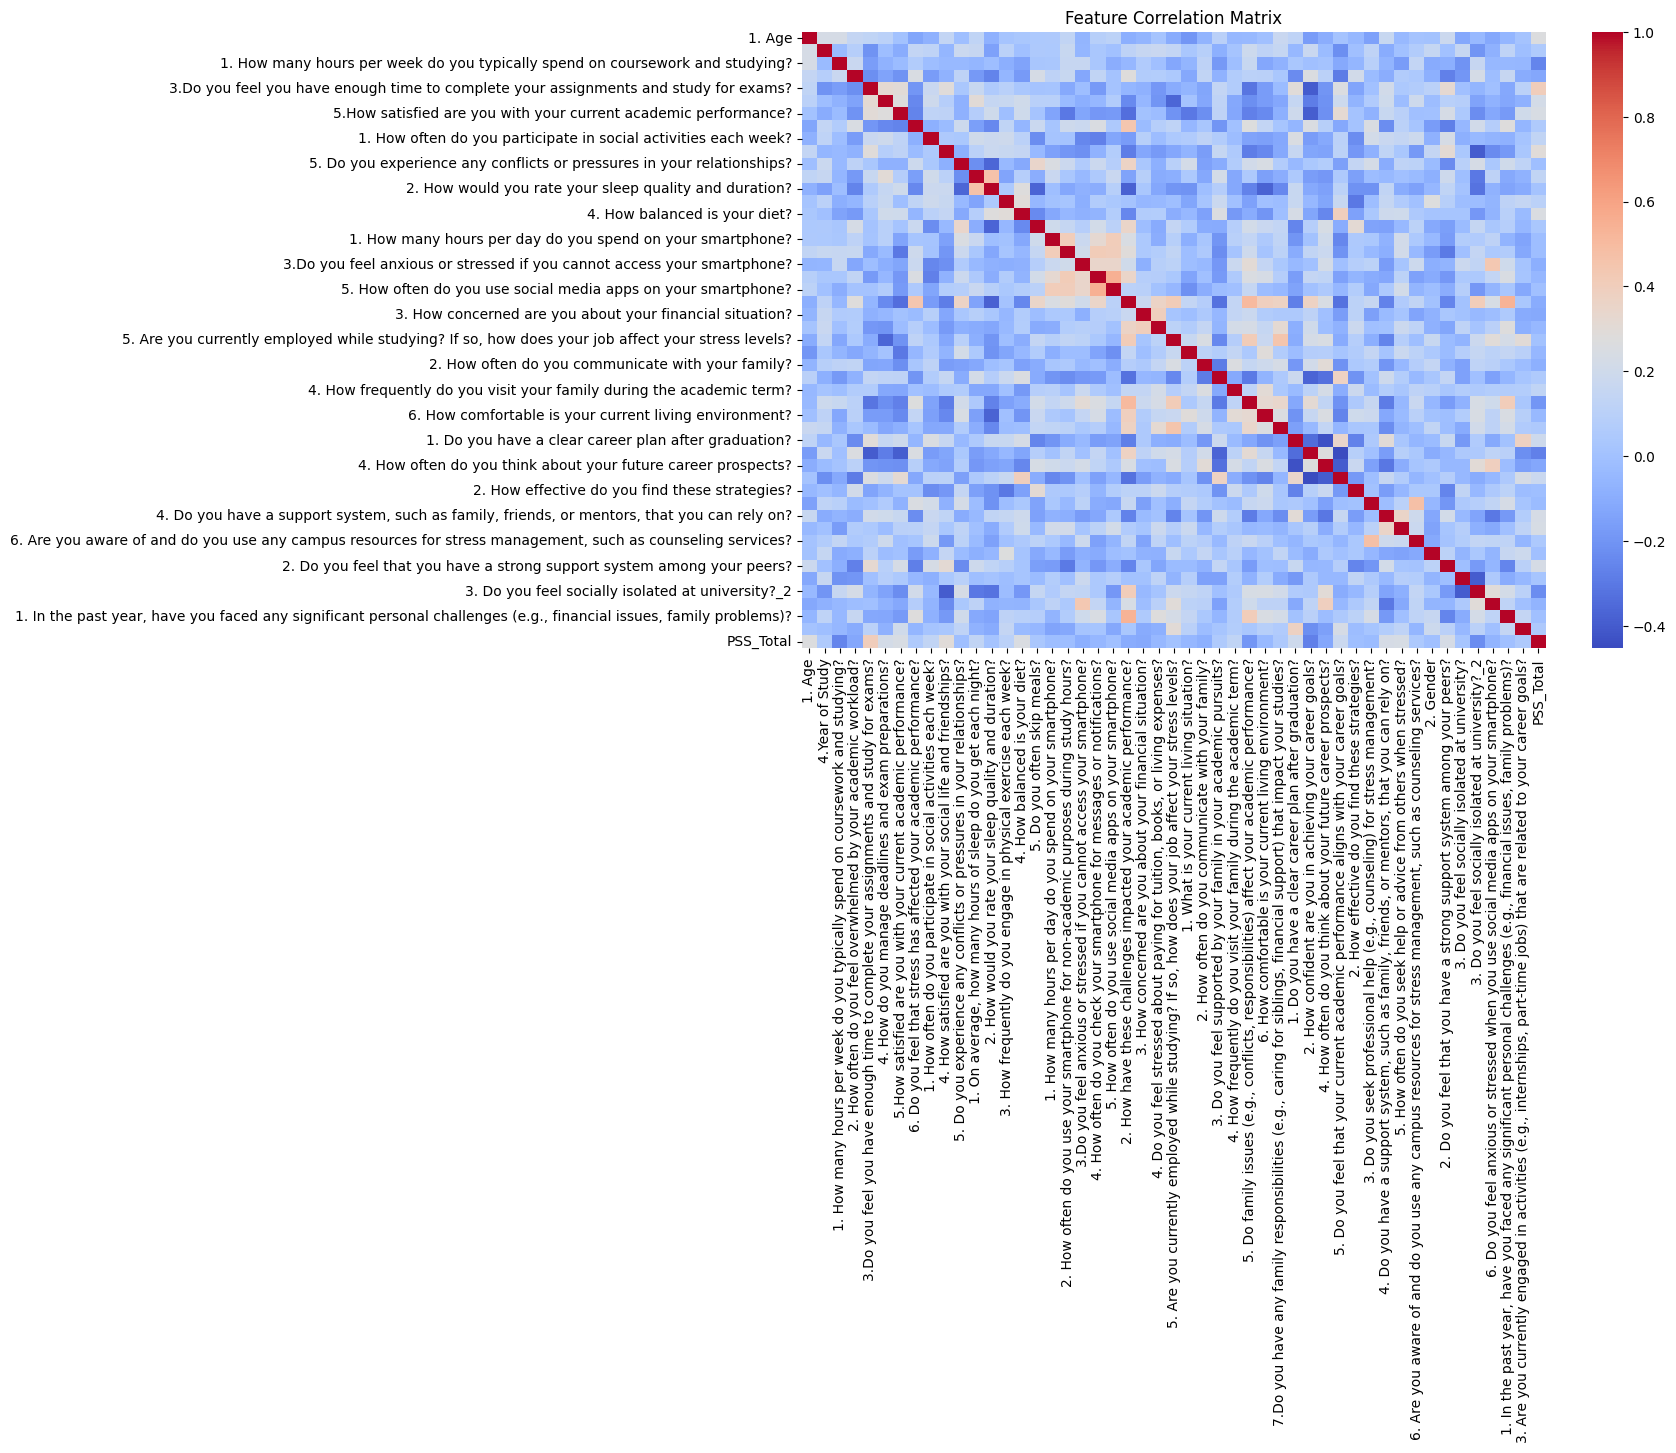

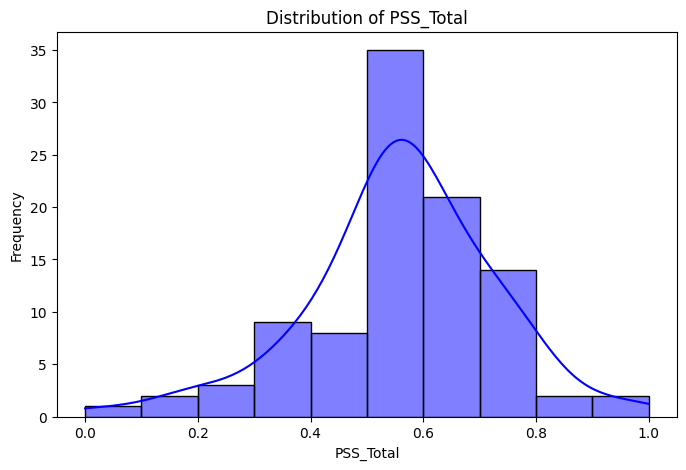

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for null values
print("\nNull Values in Dataset:")
print(data.isnull().sum())

# Visualize feature correlation
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()

# Analyze target variable distribution (PSS_Total as an example)
plt.figure(figsize=(8, 5))
sns.histplot(data['PSS_Total'], kde=True, bins=10, color="blue")
plt.title("Distribution of PSS_Total")
plt.xlabel("PSS_Total")
plt.ylabel("Frequency")
plt.show()


### **Feature Selection**

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Split dataset into features and target
X = data.drop(columns=['PSS_Total'])
y = data['PSS_Total']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Compute feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display top features
print("Top Features by Importance:")
print(feature_importances.head(15))

# Select features with importance > threshold (e.g., 0.02)
selected_features = feature_importances[feature_importances['Importance'] > 0.02]['Feature'].tolist()

# Include all PSS questions (or PSS_Total)
selected_features.append('PSS_Total')

print("\nSelected Features for Model Development:")
print(selected_features)


Top Features by Importance:
                                              Feature  Importance
4   3.Do you feel you have enough time to complete...    0.110759
6   5.How satisfied are you with your current acad...    0.085562
21  2. How have these challenges impacted your aca...    0.063187
39  5. How often do you seek help or advice from o...    0.052707
29  5. Do family issues (e.g., conflicts, responsi...    0.044369
7   6. Do you feel that stress has affected your a...    0.034482
34  4. How often do you think about your future ca...    0.034474
10  5. Do you experience any conflicts or pressure...    0.031659
12  2. How would you rate your sleep quality and d...    0.026563
15                        5. Do you often skip meals?    0.025438
11  1. On average, how many hours of sleep do you ...    0.022704
9   4. How satisfied are you with your social life...    0.022084
2   1. How many hours per week do you typically sp...    0.021849
14                      4. How balanced is your 

In [11]:
selected_features = [
    '3.Do you feel you have enough time to complete your assignments and study for exams?',
    '5.How satisfied are you with your current academic performance?',
    '2. How have these challenges impacted your academic performance?',
    '5. How often do you seek help or advice from others when stressed?',
    '5. Do family issues (e.g., conflicts, responsibilities) affect your academic performance?',
    '4. How often do you think about your future career prospects?',
    '6. Do you feel that stress has affected your academic performance?',
    '5. Do you experience any conflicts or pressures in your relationships?',
    '5. Do you often skip meals?',
    '4. How balanced is your diet?',
    '4. How satisfied are you with your social life and friendships?',
    '2. How would you rate your sleep quality and duration?',
    '4. How frequently do you visit your family during the academic term?',
    '1. How many hours per week do you typically spend on coursework and studying?',
    '2. How often do you use your smartphone for non-academic purposes during study hours?',
    '1. What is your current living situation?',
    'PSS_Total'
]


### **Implementation**

In [12]:
# Filter dataset to include selected features
refined_data = data[selected_features]

# Check for missing values
print("Missing Values in Selected Features:")
print(refined_data.isnull().sum())

# Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
numerical_columns = refined_data.select_dtypes(include=['int64', 'float64']).columns

# Apply MinMaxScaler without altering the original integer data type assumptions
refined_data[numerical_columns] = scaler.fit_transform(refined_data[numerical_columns].astype(float))


# Display the refined dataset
print("\nRefined Dataset Head:")
print(refined_data.head())

# Split data for modeling
X = refined_data.drop(columns=['PSS_Total'])
y = refined_data['PSS_Total']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain-Test Split Completed:")
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Missing Values in Selected Features:
3.Do you feel you have enough time to complete your assignments and study for exams?         0
5.How satisfied are you with your current academic performance?                              0
2. How have these challenges impacted your academic performance?                             0
5. How often do you seek help or advice from others when stressed?                           0
5. Do family issues (e.g., conflicts, responsibilities) affect your academic performance?    0
4. How often do you think about your future career prospects?                                0
6. Do you feel that stress has affected your academic performance?                           0
5. Do you experience any conflicts or pressures in your relationships?                       0
5. Do you often skip meals?                                                                  0
4. How balanced is your diet?                                                                0
4. How satisf

<ipython-input-12-e9497517bf2b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data[numerical_columns] = scaler.fit_transform(refined_data[numerical_columns].astype(float))


### **Create Stress Level Categories (Low, Moderate, High):**

In [13]:
# Create stress level categories based on PSS_Total
def categorize_stress(pss_value):
    if pss_value < 0.42:
        return 'Low'
    elif pss_value <= 0.66:
        return 'Moderate'
    else:
        return 'High'

# Apply the categorization function to PSS_Total
refined_data['Stress_Level'] = refined_data['PSS_Total'].apply(categorize_stress)

# Display the newly added column
print("\nStress Level Distribution:")
print(refined_data['Stress_Level'].value_counts())



Stress Level Distribution:
Stress_Level
Moderate    53
High        29
Low         15
Name: count, dtype: int64


<ipython-input-13-919f221225f8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_data['Stress_Level'] = refined_data['PSS_Total'].apply(categorize_stress)


### **Split Data into Features and Target:**

In [14]:
# Separate features (X) and target (y)
X = refined_data.drop(columns=['Stress_Level'])
y = refined_data['Stress_Level']

# Checking the split
print("Features (X):\n", X.head())
print("\nTarget (y):\n", y.head())


Features (X):
    3.Do you feel you have enough time to complete your assignments and study for exams?  \
0                                                  2                                      
1                                                  1                                      
2                                                  4                                      
3                                                  1                                      
4                                                  0                                      

   5.How satisfied are you with your current academic performance?  \
0                                                  3                 
1                                                  2                 
2                                                  3                 
3                                                  2                 
4                                                  0                 

   2. How have th

In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Checking the shape of the splits
print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)


Training data shape: (77, 17) (77,)
Testing data shape: (20, 17) (20,)


### **Training a Random Forest Classifier**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        10
         Low       1.00      1.00      1.00         3
    Moderate       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[10  0  0]
 [ 0  3  0]
 [ 0  0  7]]


### **Cross-Validation**

In [17]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation (e.g., 5 folds)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {cv_scores.mean()}")


Cross-Validation Scores: [0.9375     0.875      0.93333333 1.         0.93333333]
Average Cross-Validation Score: 0.9358333333333334


### **hyperparameter tuning**

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the tuned model on the test set
y_pred_tuned = best_rf_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Cross-Validation Score:  0.9366666666666668
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        10
         Low       1.00      1.00      1.00         3
    Moderate       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[10  0  0]
 [ 0  3  0]
 [ 0  0  7]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

In [38]:
# Fit the Random Forest model if it's not yet fitted
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

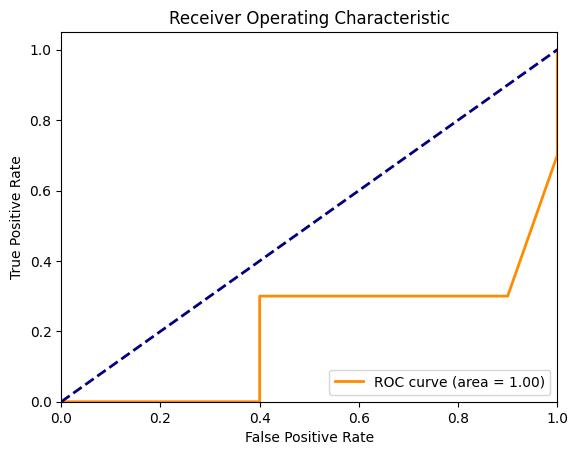

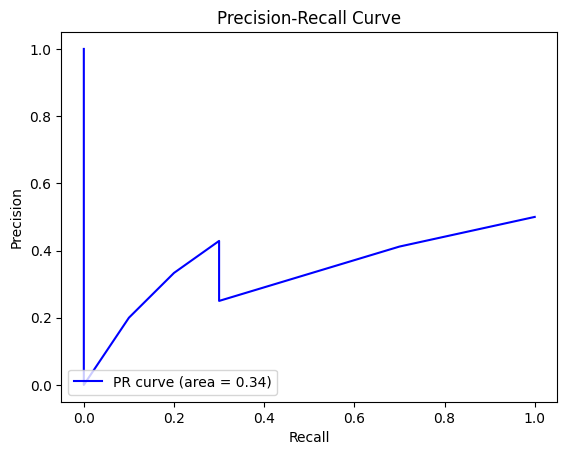

In [39]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# ROC-AUC for each class
y_prob = rf_model.predict_proba(X_test)

# Calculate AUC for each class (using class index)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Plot ROC curve for each class
fpr, tpr, _ = roc_curve(y_test, y_prob[:,1], pos_label='High')
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1], pos_label='High')
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, color='b', label='PR curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


### **Alternative models**

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.30      0.43        10
         Low       0.40      0.67      0.50         3
    Moderate       0.55      0.86      0.67         7

    accuracy                           0.55        20
   macro avg       0.57      0.61      0.53        20
weighted avg       0.63      0.55      0.52        20

Confusion Matrix:
 [[3 2 5]
 [1 2 0]
 [0 1 6]]


In [20]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the model
svm_model = SVC(kernel='linear')  # You can also try 'rbf' kernel for non-linear classification
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

        High       1.00      0.30      0.46        10
         Low       0.25      0.33      0.29         3
    Moderate       0.46      0.86      0.60         7

    accuracy                           0.50        20
   macro avg       0.57      0.50      0.45        20
weighted avg       0.70      0.50      0.48        20

Confusion Matrix:
 [[3 2 5]
 [0 1 2]
 [0 1 6]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and fit the model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


Classification Report:
               precision    recall  f1-score   support

        High       0.50      0.20      0.29        10
         Low       0.00      0.00      0.00         3
    Moderate       0.31      0.71      0.43         7

    accuracy                           0.35        20
   macro avg       0.27      0.30      0.24        20
weighted avg       0.36      0.35      0.30        20

Confusion Matrix:
 [[2 0 8]
 [0 0 3]
 [2 0 5]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'stress_level_model.pkl')


['stress_level_model.pkl']

In [41]:
# Load the saved model
loaded_model = joblib.load('/content/stress_level_model.pkl')


In [46]:
import pandas as pd
import numpy as np

# Ensure that 'features' contains the correct list of column names used during training
features = [
    '3.Do you feel you have enough time to complete your assignments and study for exams?',
    '5.How satisfied are you with your current academic performance?',
    '2. How have these challenges impacted your academic performance?',
    '5. How often do you seek help or advice from others when stressed?',
    '5. Do family issues (e.g., conflicts, responsibilities) affect your academic performance?',
    '4. How often do you think about your future career prospects?',
    '6. Do you feel that stress has affected your academic performance?',
    '5. Do you experience any conflicts or pressures in your relationships?',
    '5. Do you often skip meals?',
    '4. How balanced is your diet?',
    '4. How satisfied are you with your social life and friendships?',
    '2. How would you rate your sleep quality and duration?',
    '4. How frequently do you visit your family during the academic term?',
    '1. How many hours per week do you typically spend on coursework and studying?',
    '2. How often do you use your smartphone for non-academic purposes during study hours?',
    '1. What is your current living situation?',
    'PSS_Total'
]

# Create a sample input as a DataFrame with the correct feature names
sample_data = pd.DataFrame([[2, 3, 0.5, 2, 1, 1, 1, 2, 1, 2, 3, 3, 2, 2, 3, 2, 0]],
                           columns=features)

# Use the trained model to make a prediction
prediction = loaded_model.predict(sample_data)

# Output the predicted stress level
print(f"Predicted Stress Level for sample data: {prediction[0]}")


Predicted Stress Level for sample data: Moderate


In [48]:
import numpy as np
import pandas as pd

# Sample high stress data
sample_high_stress = pd.DataFrame({
    '3.Do you feel you have enough time to complete your assignments and study for exams?': [0],
    '5.How satisfied are you with your current academic performance?': [0],
    '2. How have these challenges impacted your academic performance?': [1],
    '5. How often do you seek help or advice from others when stressed?': [4],
    '5. Do family issues (e.g., conflicts, responsibilities) affect your academic performance?': [3],
    '4. How often do you think about your future career prospects?': [1],
    '6. Do you feel that stress has affected your academic performance?': [4],
    '5. Do you experience any conflicts or pressures in your relationships?': [4],
    '5. Do you often skip meals?': [4],
    '4. How balanced is your diet?': [0],
    '4. How satisfied are you with your social life and friendships?': [0],
    '2. How would you rate your sleep quality and duration?': [0],
    '4. How frequently do you visit your family during the academic term?': [1],
    '1. How many hours per week do you typically spend on coursework and studying?': [3],
    '2. How often do you use your smartphone for non-academic purposes during study hours?': [4],
    '1. What is your current living situation?': [2],
    'PSS_Total': [2.5]  # High stress level, indicative of high perceived stress
})

# Predict using the trained model (assuming 'rf_model' is the trained Random Forest model)
prediction_high_stress = rf_model.predict(sample_high_stress)

# Output the predicted stress level
print(f"Predicted Stress Level : {prediction_high_stress[0]}")


Predicted Stress Level : High


In [49]:
import numpy as np
import pandas as pd

# Sample low stress data
sample_low_stress = pd.DataFrame({
    '3.Do you feel you have enough time to complete your assignments and study for exams?': [4],
    '5.How satisfied are you with your current academic performance?': [4],
    '2. How have these challenges impacted your academic performance?': [0],
    '5. How often do you seek help or advice from others when stressed?': [1],
    '5. Do family issues (e.g., conflicts, responsibilities) affect your academic performance?': [0],
    '4. How often do you think about your future career prospects?': [0],
    '6. Do you feel that stress has affected your academic performance?': [0],
    '5. Do you experience any conflicts or pressures in your relationships?': [0],
    '5. Do you often skip meals?': [0],
    '4. How balanced is your diet?': [4],
    '4. How satisfied are you with your social life and friendships?': [4],
    '2. How would you rate your sleep quality and duration?': [4],
    '4. How frequently do you visit your family during the academic term?': [4],
    '1. How many hours per week do you typically spend on coursework and studying?': [1],
    '2. How often do you use your smartphone for non-academic purposes during study hours?': [1],
    '1. What is your current living situation?': [1],
    'PSS_Total': [0.2]  # Low stress level, indicative of low perceived stress
})

# Predict using the trained model (assuming 'rf_model' is the trained Random Forest model)
prediction_low_stress = rf_model.predict(sample_low_stress)

# Output the predicted stress level
print(f"Predicted Stress Level for sample low stress data: {prediction_low_stress[0]}")


Predicted Stress Level for sample low stress data: Low
